## Investigating Fandango's movie ratings
* In a previous data analysis study, a data journalist named Walt Hickey investigated Fandango's movie ratings system and said it was biased and dishonest. Fandango's officials said it was a bug and promised to fix as soon as possible. 

* Our goal in this project is to analyze more recent movie ratings and see if there is any change after Hickey's analysis.  
* In the coming work, we'll be comparing between previous [data](https://github.com/fivethirtyeight/data/tree/master/fandango) collected by Hickey and a [recent data](https://github.com/mircealex/Movie_ratings_2016_17) collected by a Dataquest expert.

## Import libraries and reading the data

In [1]:
import pandas as pd

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_2016_17.csv')

fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [9]:
# isolate columns in different variable
fandango_15 = fandango_score_comparison[['FILM','Fandango_Stars','Fandango_Ratingvalue',\
                                         'Fandango_votes','Fandango_Difference']].copy()
fandango_16_17 = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

In [10]:
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
fandango_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The main goal of this analysis is to determnine whether there has been changes in Fandango's rating after Hickey's analysis or not. The population of interest is all the movie reatings stored on Fandango's website where it should be sampled at two different points of time; before and after Hickey's analysis so we can lead a goos comparison.  

From [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and the two README.md files of the datasets available [here](https://github.com/fivethirtyeight/data/tree/master/fandango) and [here](https://github.com/mircealex/Movie_ratings_2016_17), we can see that the sampling process followed specific criteria: 
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews.  


This leads us to infer that the two samples are not really representative of the population of interest. Where the first sample is not random because not each movie had the same chance to be included in the sample, the second sample is subject to temporal trends.



## Changing the goal of our analysis 

In order to make the samples in hand representative, we'll slitly modify the goal of our analysis to finding out if there is any difference between Fandango's ratings for popular movies in 2015 and movis in 2016.

## Isolating the samples we need

In [22]:
# Check if most samples points are popular ( more than 30 fan ratings on Fandango's website)
sum(fandango_15['Fandango_votes']> 30)

146

In [20]:
fandango_15.shape

(146, 5)

* We can easily check that all the samples points (146 movies) are popular ones.  

#### Checking the representativity of the second sample

As the second sample does not provide information about the popularity of the movies, one way to figure out is to randomly sample 20 movies from it and check the number of fan ratings on [Fandango's website](https://www.fandango.com/) one by one.   

In [42]:
sample = fandango_16_17.sample(20, random_state = 0)
sample

,movie,year,fandango
197,The Take (Bastille Day),2016,4.0
37,Come and Find Me,2016,4.0
89,Kickboxer,2016,4.0
176,The Founder,2016,4.0
170,The Darkness,2016,2.5
75,Ice Age: Collision Course,2016,4.0
96,Lion,2016,4.0
137,Ride Along 2,2016,4.0
5,A Monster Calls,2016,4.0
83,Jane Got a Gun,2016,3.5


In [43]:
sample['Fandango_votes'] = [29,2,5,1030,910,2241,3703,6659,498,365,22565,4,5569,22,10,8,2688,11450,601,66]
sample

,movie,year,fandango,Fandango_votes
197,The Take (Bastille Day),2016,4.0,29
37,Come and Find Me,2016,4.0,2
89,Kickboxer,2016,4.0,5
176,The Founder,2016,4.0,1030
170,The Darkness,2016,2.5,910
75,Ice Age: Collision Course,2016,4.0,2241
96,Lion,2016,4.0,3703
137,Ride Along 2,2016,4.0,6659
5,A Monster Calls,2016,4.0,498
83,Jane Got a Gun,2016,3.5,365


In [46]:
sum(sample['Fandango_votes']> 30)/20

0.65

65% of sample points are popular movies (more than 30 fans ratings) which is quite enough to tell that the sample is representative of the population of interest.

In [27]:
 fandango_16_17['movie']

0                     10 Cloverfield Lane
1                                13 Hours
2                     A Cure for Wellness
3                         A Dog's Purpose
4                 A Hologram for the King
5                         A Monster Calls
6                  A Street Cat Named Bob
7         Alice Through the Looking Glass
8                                  Allied
9                           Amateur Night
10                             Anthropoid
11                Approaching the Unknown
12                                Arrival
13                                Arsenal
14                       Assassin's Creed
15                               Bad Moms
16                            Bad Santa 2
17               Barbershop: The Next Cut
18     Batman V Superman: Dawn of Justice
19                   Beauty and the Beast
20                          Before I Fall
21                       Before the Flood
22                                Ben-Hur
23                         Bitter 

In [64]:
# Isolate the movies released in 2015 and 2016
movies_2016 = fandango_16_17[fandango_16_17['year'] == 2016]

In [65]:
import warnings
warnings.filterwarnings('ignore')
movies_2015 = fandango_15[fandango_15['FILM'].str.contains('2015')]
movies_2015['year'] = 2015 

(0, 5)

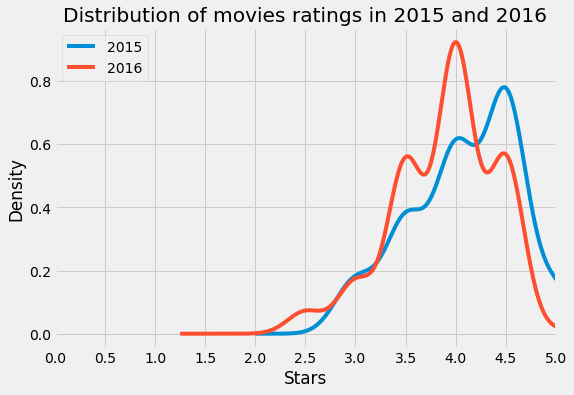

In [78]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

movies_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
movies_2016['fandango'].plot.kde(label = '2016', legend = True, figsize = (8,5.5))
plt.title('Distribution of movies ratings in 2015 and 2016')
plt.xlabel('Stars')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlim(0,5)

* The shape of both ratings are strongly left skewed.  
* The graph shows evidence that there is a change between Fandango's ratings for popular movies in 2016 compared to 2015 where the ratings are slightly lower in 2016. 

## Comparing relative frequencies 

In [81]:
# Frequency distribution table for movies in 2015
movies_2015['Fandango_Stars'].value_counts()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [82]:
# Frequency distribution table for movies in 2016
movies_2016['fandango'].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

Since the samples have different number of movies, it won't make sense to compare the two tables using absolute frequencies. It would be better to use relative frequencies based on percentages for readability.

In [87]:
# Relative frequency distribution table for movies in 2015
movies_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()* 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [88]:
# Relative frequency distribution table for movies in 2016
movies_2016['fandango'].value_counts(normalize = True).sort_index()* 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can also infer from these two tables that there is indeed a difference between the two distributions:  
* For the high ratings (4.5 and 5), the rate is significantly lower in 2016 compared to 2015. 
* For the low ratings, percentages were also lower in 2016 compared to 2015 where the minimum reached 2.5 versus 3 in 2015. 

On the other hand, we can see that percentages are higher for the ratings 3.5 and 4 in 2016 compared to 2015 which challenges the direction of the change we saw on the kernel density plots. 

## Determining the direction of the change

#### Computing the mean, mode and median for each distribution 

In [113]:
# Metrics for movies in 2015
mean_15 = movies_2015['Fandango_Stars'].mean()
mode_15 = movies_2015['Fandango_Stars'].mode()[0]
median_15 = movies_2015['Fandango_Stars'].median()

In [114]:
# Metrics for movies in 2016
mean_16 = movies_2016['fandango'].mean()
mode_16 = movies_2016['fandango'].mode()[0]
median_16 = movies_2016['fandango'].median()

In [115]:
metrics = pd.DataFrame({'2015':[mean_15,mode_15,median_15],'2016':[mean_16,mode_16,median_16]},index = ['mean','mode','median'])
metrics

,2015,2016
mean,4.085271,3.887435
mode,4.500000,4.000000
median,4.000000,4.000000


* From these metrics, we can infer that the ratings are lower in 2016 compared to 2015 since the mean and mode values are less in 2016.

#### Grouped bar plot

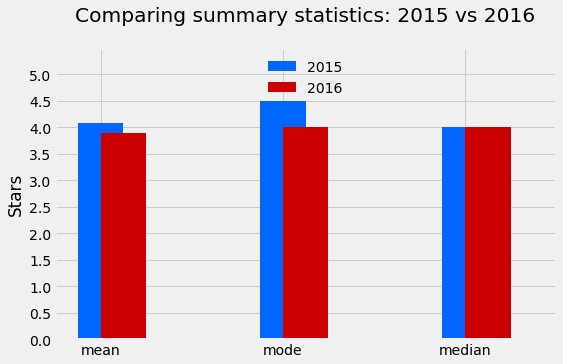

In [122]:
plt.style.use('fivethirtyeight')
metrics['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
metrics['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 by almost 0.2. The median is the same for both distribution while the mode decreased by 0.5 in 2016. This confirms the direction of the change we saw on the kernel density where movies ratings in 2016 are lower than 2015. 

## Conclusion 

The analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.
